# Metodos no Supervisados

## Algoritmo K - Medias

### Ejemplo:

In [3]:
# Importando bibliotecas
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [7]:
# ver directorio
import os
print(os.getcwd())
os.chdir("/Users/heinerleivagmail.com")

/Users/heinerleivagmail.com


In [8]:
# Importando dataset
data = pd.read_csv("twitter.csv", delimiter = ',', decimal = '.')
data.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [12]:
# Inspeccionando dataset
data.info()

# Vemos que tenemos un objeto que es el usuario 
# Las demas son variables continuas excepto la ultima que una variable categorica codificada.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


In [14]:
# Estadisticas basicas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
op,140.0,44.414591,8.425723,30.020465,38.206484,44.507091,49.365923,71.696129
co,140.0,22.977135,5.816851,7.852756,19.740299,22.466718,26.091606,49.637863
ex,140.0,40.764428,7.185246,18.693542,36.095722,41.457492,45.197769,59.824844
ag,140.0,22.918528,7.657122,9.305985,17.050993,21.384554,28.678867,40.583162
ne,140.0,8.000098,3.039248,1.030213,6.086144,7.839722,9.758189,23.978462
wordcount,140.0,98.715484,44.714071,5.020800,66.218475,94.711400,119.707925,217.183200
categoria,140.0,4.050000,2.658839,1.000000,2.000000,3.500000,7.000000,9.000000


In [20]:
# Inspeccionando ultima variable 
data['categoria']
# Otra forma data.iloc[:,7:8]

# El orden no es importante simplemente es una categorizacion 

0      7
1      7
2      4
3      2
4      4
      ..
135    7
136    4
137    2
138    1
139    1
Name: categoria, Length: 140, dtype: int64

In [ ]:
# Para ver las categorias unicas que hay
data['categoria'].unique()

### Explicacacion

El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

1. Actor/actriz
2. Cantante
3. Modelo
4. Tv, series
5. Radio
6. Tecnología
7. Deportes
8. Politica
9. Escritor

In [23]:
# Contando cantidad en cada categoria 

data['categoria'].value_counts()

2    34
1    27
4    19
7    17
8    16
3     9
6     8
9     6
5     4
Name: categoria, dtype: int64

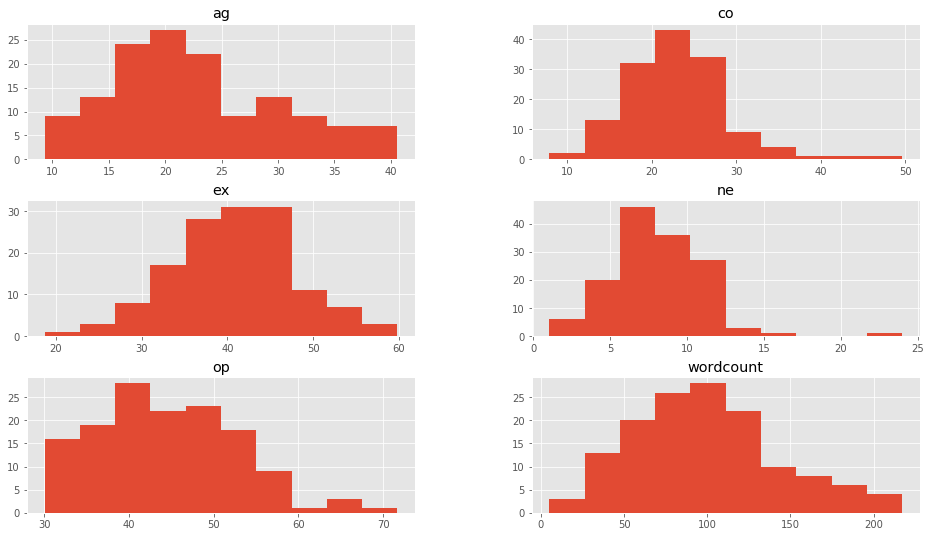

In [25]:
# Visualizacion de datos excluyendo categoria
data.drop(['categoria'],1).hist()
plt.show()

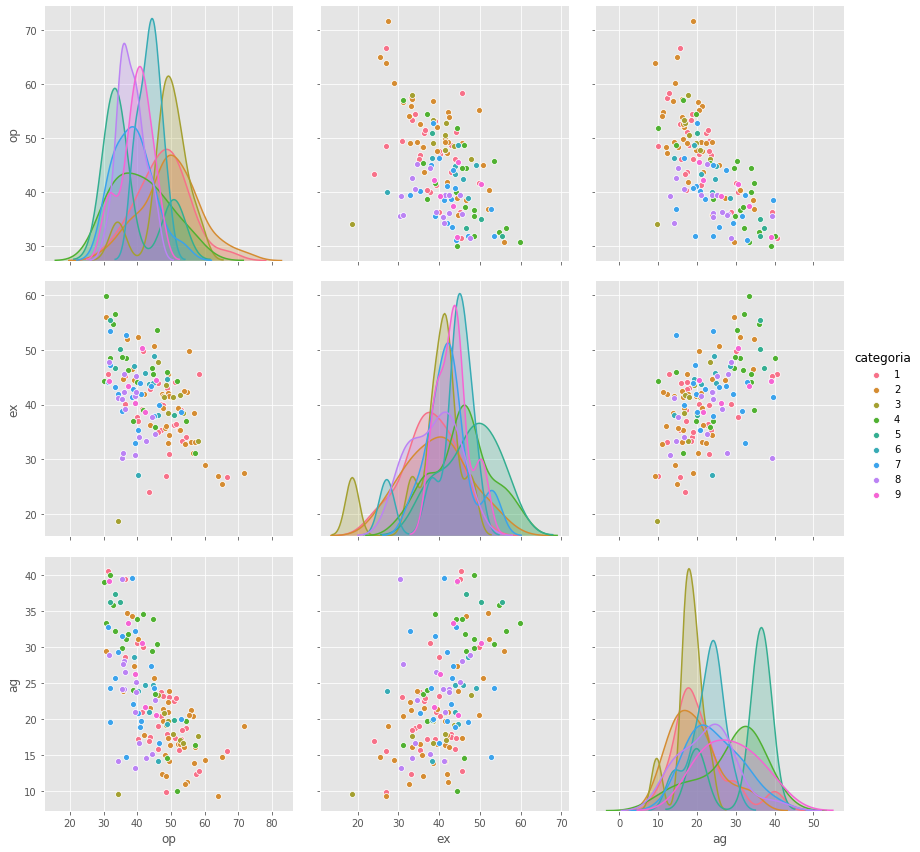

In [27]:
# Vamos a seleccionar tres dimensiones: op, ex, ag y se van a cruzar

sb.pairplot(data.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter');

In [28]:
# No parece haber ningun tipo de correlacion o agrupacion de los usuarios y sus categorias

### Definiendo datos de entrada

In [34]:
X = np.array(data[["op","ex","ag"]])
y = np.array(data['categoria']) # a la que quiero llega
X.shape

(140, 3)

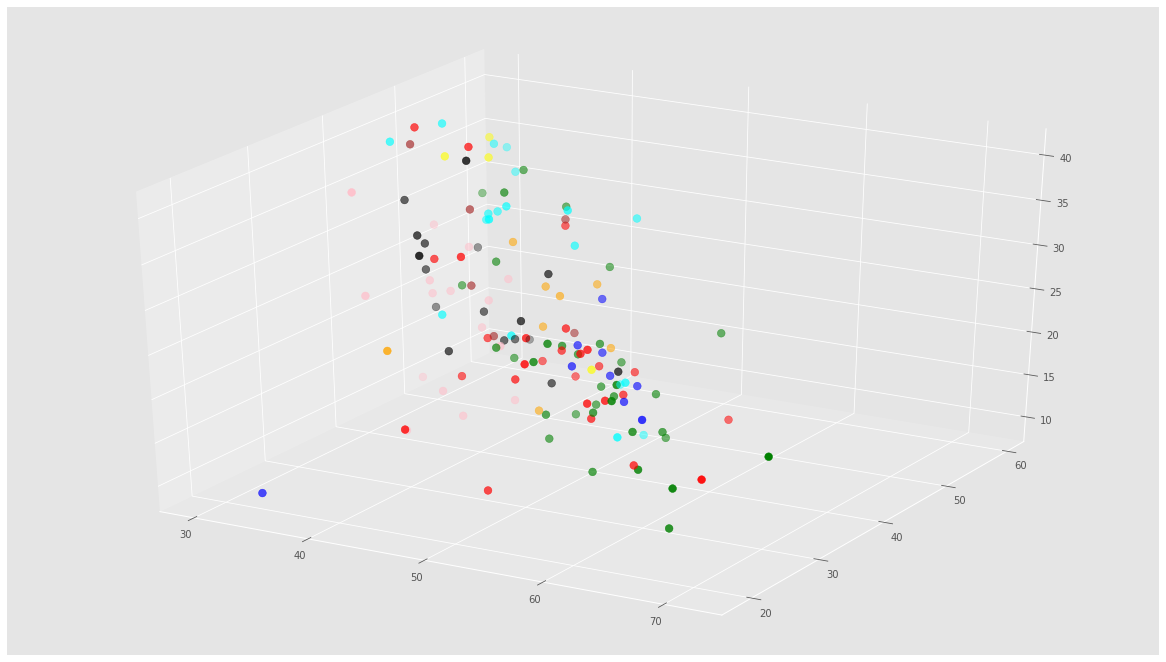

In [37]:
# Creamos una grafica con colores por cada categoria
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60);

In [38]:
# Objetivo: crear clusters diferenciados para reducir distancia intra cluster y aumentar la distancia inter cluster

### Obteniendo el valor de K con el Codo de Jambu

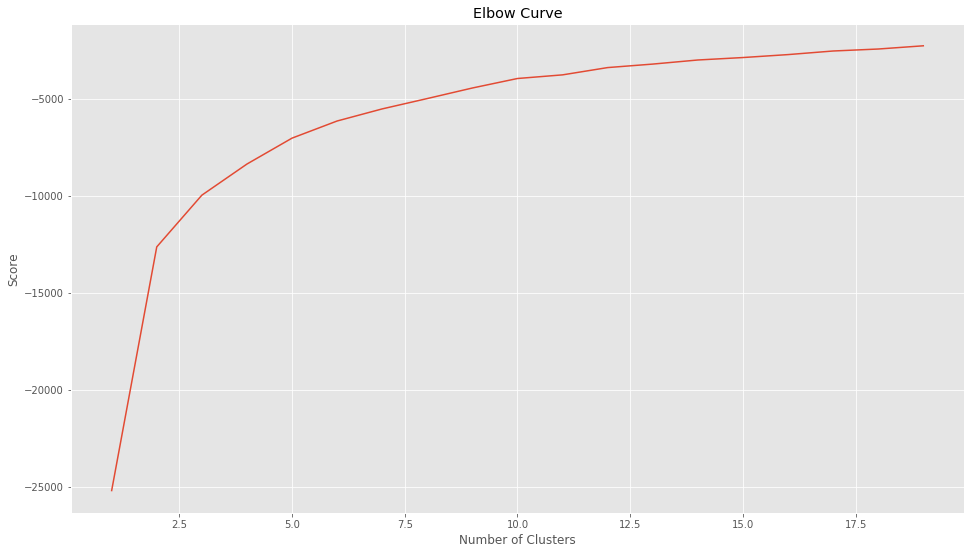

In [39]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [40]:
# Adonde vemos que se emnpieza a dar un descenso y estabilizar el codo? 5 y 7 parecen ser buenos puntos, pero en definitiva el mejor es el 12

### Ejecutando k Medias

In [78]:
# Obteniendo centroides
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[43.42489342 32.20419121 19.27634421]
 [35.90241306 47.56828232 33.58748762]
 [59.42730336 30.78901593 16.13449193]
 [39.94672753 42.82349753 23.72594859]
 [50.29293117 40.88830576 17.44525734]]


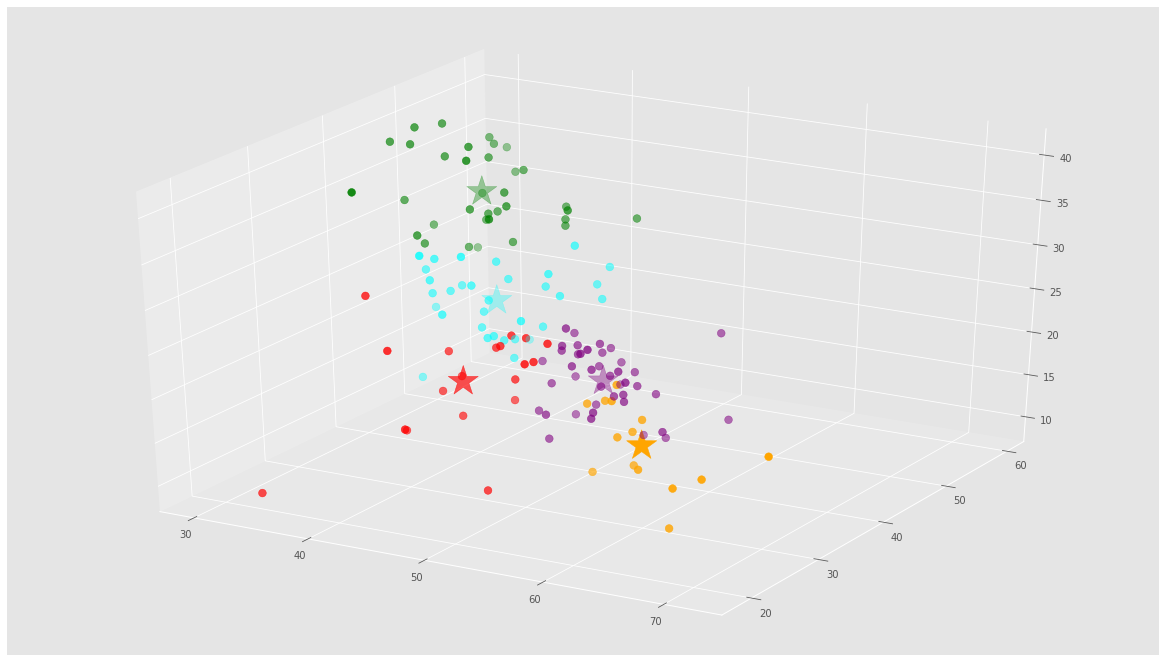

In [79]:
# Obteniendo Clusters

labels = kmeans.predict(X)
# Centros del cluster
C = kmeans.cluster_centers_
colores=['red','green','orange','cyan', 'purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000);

### Analisis

Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios de Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes.

Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.

In [44]:
# Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación

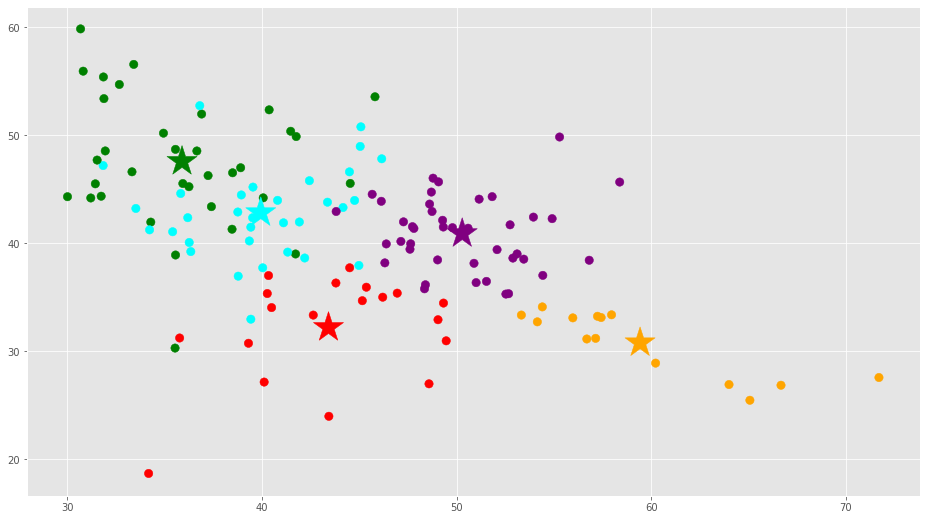

In [80]:
# Obteniendo valores y ploteando 
f1 = data['op'].values
f2 = data['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

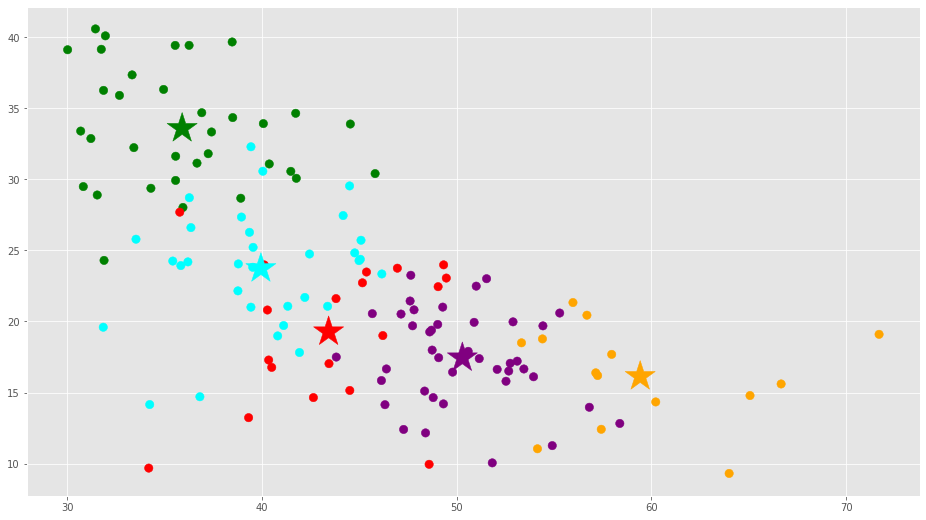

In [81]:
f1 = data['op'].values
f2 = data['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

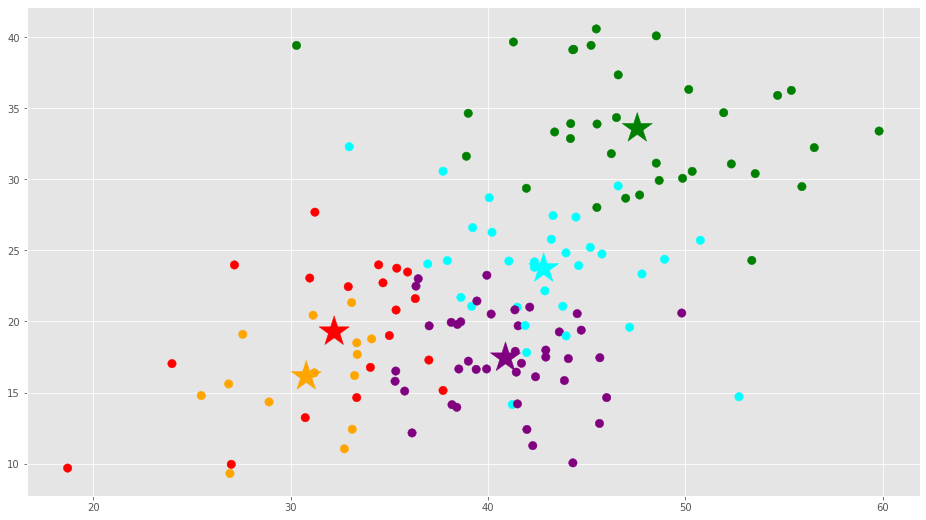

In [82]:
f1 = data['ex'].values
f2 = data['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [49]:
# Podemos ver que los clusters estan bien diferenciados entre si

### Visualizando cantidad de usuarios dentro de cada Cluster

In [83]:
copy =  pd.DataFrame()
copy['usuario']=data['usuario'].values
copy['categoria']=data['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,19
1,green,34
2,orange,14
3,cyan,32
4,purple,41


In [84]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,6.0
2,2,3.0
3,3,1.0
4,4,1.0
5,5,NaN
6,6,1.0
7,7,1.0
8,8,6.0
9,9,NaN


In [56]:
# Ver modelos y Radio

In [85]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
# Recordar que son 5 clusters

array([123,  98,  82,  64,  21])

In [86]:
users=data['usuario'].values
for row in closest:
    print(users[row])

SJP
maria_patino
JudgeJudy
ierrejon
carmenelectra


In [87]:
filtro = data[data.usuario.isin(['SJP','maria_patino','JudgeJudy','ierrejon','carmenelectra'])]
print(filtro)

           usuario         op         co         ex         ag         ne  \
21   carmenelectra  50.594462  19.282538  41.383154  17.896538  11.225692   
64        ierrejon  39.528547  24.875983  42.353077  23.810769   7.340855   
82       JudgeJudy  57.145227  21.955795  31.194545  16.385000   4.713864   
98    maria_patino  37.240989  20.251978  46.254286  31.804286   7.949890   
123            SJP  46.210000  31.217778  35.002222  19.006667   8.821111   

     wordcount  categoria  
21    143.8231          3  
64     91.6325          8  
82    103.9773          4  
98     55.7143          4  
123   112.5556          1  


In [63]:
# 3 Modelo
# 4 Tv Series
# 8 Politica
# 1 Actor/actriz

In [65]:
#################################################### FIN #########################################